In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks, peak_prominences

In [ ]:
def calculate_x(df):
    # Extracting the 'Wavelength(nm)' and 'Instant Intensity' columns
    wavelength_column = df['Wavelength(nm)']
    irradiance_sample_column = df['Instant Intensity']

    # Creating a new DataFrame for the results
    result_df = pd.DataFrame({'Wavelength(nm)': wavelength_column, 'Instant Intensity': irradiance_sample_column})
    for column in df.columns[2:]:
        # Calculate x using the formula x = Irradiance [mW m-2 nm-1] / Instant Intensity
        x_values = df[column] / irradiance_sample_column

        # Add the calculated values to the result DataFrame
        result_df[column + '_x'] = x_values

    return result_df


In [ ]:
try:
    df = pd.read_csv('C:/Users/Admin/Desktop/Data sets/correct/4.csv')
    result_df = calculate_x(df)
    print(result_df)

except Exception as e:
    print(f"An error occurred: {e}")

     Wavelength(nm)  Instant Intensity  Irradiance [mW m-2 nm-1]_x  \
0           399.974           3.910207                    0.141517   
1           400.338           5.493180                    0.164458   
2           400.702           7.358740                    0.270359   
3           401.066          10.000506                    0.287210   
4           401.430          13.038530                    0.336210   
..              ...                ...                         ...   
861         698.861        1014.957469                    0.705577   
862         699.190         996.400708                    0.707113   
863         699.519         976.656159                    0.708492   
864         699.848         956.283703                    0.711510   
865         700.177         936.739066                    0.712289   

     Irradiance [mW m-2 nm-1].1_x  Irradiance [mW m-2 nm-1].2_x  \
0                        0.097664                      0.161088   
1                        

In [ ]:
x_column = result_df['Irradiance [mW m-2 nm-1]_x']
wavelength_column = result_df['Wavelength(nm)']

In [ ]:
peaks, _ = find_peaks(x_column, prominence=0.01)
prominences = peak_prominences(x_column, peaks)[0]

In [ ]:
homogeneous_peaks = []
differences = [abs(x_column[peaks[i]] - x_column[peaks[i+1]]) for i in range(len(peaks) - 1)]

for i in range(len(differences) - 3):
    avg_diff = (differences[i] + differences[i+1] + differences[i+2] + differences[i+3]) / 4
    homogeneous_peaks.append(peaks[i:i+5])
intensities = [x_column[peak] for peak in peaks]

# Sort the peaks based on intensity
sorted_peaks = [peak for _, peak in sorted(zip(intensities, peaks), reverse=True)]

# Select the best combination of peaks
best_combination = sorted_peaks[:5]

# Print the best combination of peaks
print("Best combination of peaks:", best_combination)
# Print the wavelength values of the best combination of peaks
best_wavelengths = wavelength_column[best_combination]
print("Wavelength values of the best combination of peaks:", best_wavelengths)


Best combination of peaks: [224, 300, 170, 381, 465]
Wavelength values of the best combination of peaks: 224    480.604
300    507.522
170    461.341
381    535.958
465    565.167
Name: Wavelength(nm), dtype: float64


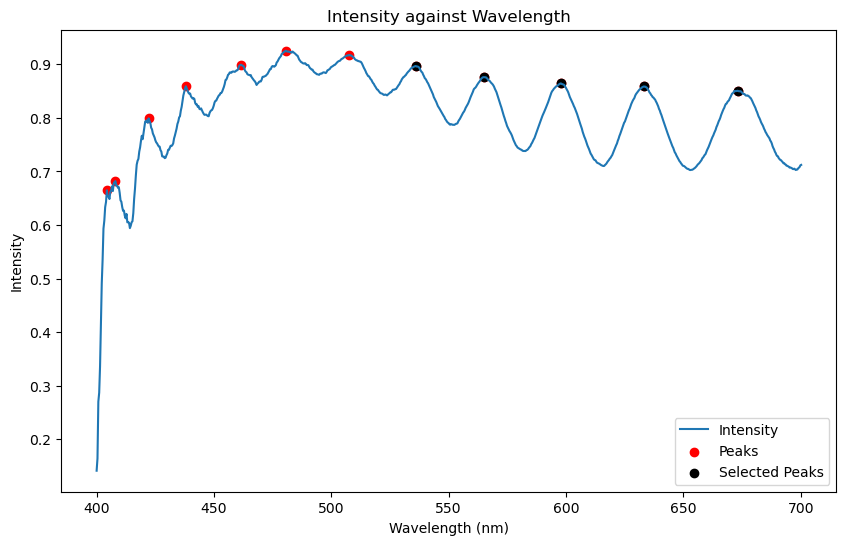

Selected Wavelength values:
[535.958, 565.167, 597.851, 633.196, 673.066]


In [ ]:
# Plot the graph with peaks and their prominences
plt.figure(figsize=(10, 6))
plt.plot(wavelength_column, x_column, label='Intensity')
plt.scatter(wavelength_column[peaks], x_column[peaks], color='red', label='Peaks')

# Convert the indices from peak_group to a list and use it to access the values from wavelength_column and x_column
selected_wavelengths = wavelength_column[peak_group].tolist()
selected_intensities = x_column[peak_group].tolist()
plt.scatter(selected_wavelengths, selected_intensities, color='black', label='Selected Peaks')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Intensity against Wavelength')
plt.legend()
plt.show()

# Print the selected wavelength values
print("Selected Wavelength values:")
print(selected_wavelengths)


In [ ]:
# Assuming you have a DataFrame with peak wavelengths, replace this with your actual DataFrame
selected_wavelengths_df = pd.DataFrame({'Wavelength': selected_wavelengths})

# Provide sequence of wavelengths
provided_wavelengths = selected_wavelengths_df['Wavelength'].values

# Create a dictionary to map actual wavelengths to provided sequence
wavelength_mapping = {actual: f'Wavelength {i}' for i, actual in enumerate(provided_wavelengths, start=1)}

# Label the peaks using the mapping
selected_wavelengths_df['Label'] = selected_wavelengths_df['Wavelength'].map(wavelength_mapping)

# Print the DataFrame with labels
print(selected_wavelengths_df[['Label', 'Wavelength']])

# Calculate d for each pair of adjacent peaks with modulus using peak wavelengths
d_values = []
for i in range(1, len(provided_wavelengths)):
    lambda_n = provided_wavelengths[i - 1]
    lambda_n1 = provided_wavelengths[i]

    # Skip pairs where the difference is zero or any other condition
    difference = lambda_n1 - lambda_n
    if difference != 0:
        d = 1 / (2 * np.abs(1 / lambda_n1 - 1 / lambda_n)) * 0.001
        d_values.append(d)

# Display the calculated d values for the respective wavelengths starting from the second wavelength
for i, d in enumerate(d_values):
    print(f"Cell Gap (d{i + 1}): {d:.2f} nm")

          Label  Wavelength
0  Wavelength 1     535.958
1  Wavelength 2     565.167
2  Wavelength 3     597.851
3  Wavelength 4     633.196
4  Wavelength 5     673.066
Cell Gap (d1): 5.19 nm
Cell Gap (d2): 5.17 nm
Cell Gap (d3): 5.36 nm
Cell Gap (d4): 5.34 nm


In [ ]:
# Calculate the average value of d_values
average_d = np.mean(d_values)

# Display the average value with only two decimal places
print(f" Cell Gap (D): {average_d:.2f} nm")

 Cell Gap (D): 5.26 nm
